In [1]:
import shap
import interpret
import numpy as np
import pandas as pd
from interpret.glassbox import ExplainableBoostingClassifier

"is not" with a literal. Did you mean "!="?


In [2]:
shap.__version__

'0.40.0'

In [3]:
interpret.__version__

'0.2.7'

In [4]:
SIZE = int(1e4)
data = pd.DataFrame(
    {
        "x1": np.random.rand(SIZE),
        "x2": np.random.rand(SIZE),
        "x3": np.random.rand(SIZE)
    }
)
data["y"] = data.mean(axis=1) > 0.5
X = data.iloc[:, :-1]
y = data["y"]
data

,x1,x2,x3,y
0,0.240366,0.510500,0.913723,True
1,0.545920,0.260575,0.152753,False
2,0.401470,0.991586,0.367300,True
3,0.229015,0.489554,0.493303,False
4,0.458618,0.081202,0.419700,False
...,...,...,...,...
9995,0.489143,0.481116,0.018587,False
9996,0.183400,0.211407,0.944334,False
9997,0.558736,0.631009,0.214630,False
9998,0.347326,0.711041,0.120811,False


In [5]:
model = ExplainableBoostingClassifier(interactions=0).fit(X, y)
model

ExplainableBoostingClassifier(feature_names=['x1', 'x2', 'x3'],
                              feature_types=['continuous', 'continuous',
                                             'continuous'],
                              interactions=0)

In [6]:
explainer = shap.Explainer(model, X)
explainer

In [7]:
assert explainer.linearize_link

In [8]:
explanation = explainer(X)
type(explanation)

shap._explanation.Explanation

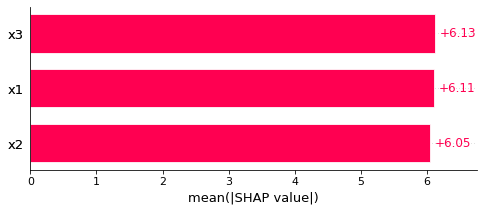

In [9]:
shap.plots.bar(explanation)